<a href="https://colab.research.google.com/github/hellfireworld/MachineLearning/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Alexandros_Tsevrenis_MTN1914***

# **Import essential libraries**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import io
import numpy as np
import pandas as pd
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import IPython
from IPython.display import Image
import pydotplus

# **Import day.csv file with GOOGLE_COLAB**

In [0]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving digit_recognizer_dataset.csv to digit_recognizer_dataset (1).csv


In [6]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "digit_recognizer_dataset.csv" with length 76775041 bytes


**Test if day.csv is loaded by removing comment '#' below**

In [0]:
#uploaded

# **Read the dataset from the CSV file**

**Define df variable as day.csv using pandas library.
Read separated values (csv) file into DataFrame.**

In [0]:
df = pd.read_csv(io.StringIO(uploaded['digit_recognizer_dataset.csv'].decode('utf-8')))

# **Print the shape of our whole data (rows, columns)**

In [8]:
print(df.shape)


(42000, 785)


# **Firstly, split the pixelX features from the first column and store them in X, secondly store the first column as the prediction feature/variable as y**

In [0]:
X = df.iloc[:, 1:]
y = df['label']

# **Define kf as Kfold Cross Validation and add the parameters (splits=5)**

In [0]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
acc_train = 0.0
acc_test = 0.0
best_clf = None

# **Split the dataset with kfold into train and test**

In [0]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# **Explore the Dataset**
# **Check X_train and X_test's shapes(rows, columns)**
# **Print the head of X_train and Y_train**
# **Describe X_train and y_train(mean, std, min, max, etc.)**

In [12]:
print(X_train.shape)
print(X_test.shape)
print("\n")
print(X_train.head())
print(y_train.head())
print("\n")
print(X_train.describe())
print(y_train.describe())

(33600, 784)
(8400, 784)


   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]
0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


        pixel0   pixel1   pixel2  ...  pixel781  pixel782  pixel783
count  33600.0  33600.0  33600.0  ...   33600.0   33600.0   33600.0
mean       0.0      0.0      0.0  ...       0.0       0.0       0.0
std        0.0      0.0      0.0  ...       0.0       0.0       0.0
min        0.0      0.0      0.0  ...       0.0       0.0       0.0
25%        0.0      0.0      0.0  ...       0.0       0.0       0.0
50% 

# **We can check whether the training data-set is biased towards certain numbers or not by printing out the value_counts() and from the distribution plot of labels.**

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


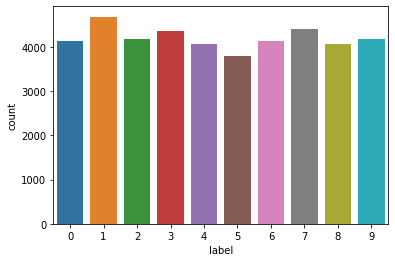

In [13]:
print(y.value_counts())
sns.countplot(y)
plt.show()

**We see that it is a little biased in digit 1 and the samples we have counted for label 1 is around 30% higher than sample 5**

# **Rescale our X so we can append it in SVC Classifier and split the data using kfold cross validation with X_scale this time**

In [0]:
X = X/255.0

#scale
X_scaled = scale(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# if we use train_test_split method we get little lower accuracy but faster compile
#X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

# **Linear Model**

In [22]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
# predict
y_pred = model_linear.predict(X_test)
# confusion matrix and accuracy
print("accuracy_linear:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# cm
print("Metric: Confusion Matrix:")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

#The linear model gives approx. 92.4% accuracy.

accuracy_linear: 0.9246428571428571 

Metric: Confusion Matrix:
[[822   0   8   4   1   6   9   1   1   0]
 [  0 933   3   1   2   1   0   1   8   1]
 [ 12   8 733  15   6   2   7   4  12   2]
 [  2   8  22 808   3  21   2   2  10   4]
 [  3   7   9   0 755   1   7   1   2  26]
 [  8   8   9  39   9 646   6   1  15   6]
 [  6   3  12   0   5   9 796   0   0   0]
 [  1   3   8   3   7   0   0 840   2  20]
 [  9  18  16  29   5  24   4   1 691   5]
 [  5   5   5  11  33   7   0  25   6 743]]


**To know how many digits were misclassified we can print out the Confusion-Matrix**

**We understood that out of many zeros 822 were correctly classified and same thing is going on next..**

**The linear model gives approx. 92.4% accuracy.**

# **Let's look at a Non-Linear Model with randomly chosen hyperparameters.**

In [23]:
# non-linear model
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(X_train, y_train)
# predict
y_pred = non_linear_model.predict(X_test)
# confusion matrix and accuracy
# accuracy
print("accuracy_non_linear:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# cm
print("Metric: Confusion Matrix:")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy_non_linear: 0.9598809523809524 

Metric: Confusion Matrix:
[[832   0   4   0   1   1   9   1   3   1]
 [  0 938   4   0   2   1   1   0   3   1]
 [  3   0 776   5   3   0   6   3   4   1]
 [  0   5  10 845   1  10   1   3   4   3]
 [  3   4   7   0 772   2   3   2   3  15]
 [  5   2  11  12   5 700   4   0   6   2]
 [  5   2  11   0   2   4 807   0   0   0]
 [  1   1  12   1   4   1   0 860   1   3]
 [  2  11  14   4   3  10   2   0 756   0]
 [  3   3   9   8  11   2   0  21   6 777]]


**To know how many digits were misclassified we can print out the Confusion-Matrix**

**We understood that out of many zeros 832 were correctly classified and same thing is going on next.. We understand that this non linear's model confusion matrix is better than the linears' model confusion matrix**

**The non linear model with random hyperparameters gives approx. 95.9% accuracy.**

# **PLOT**

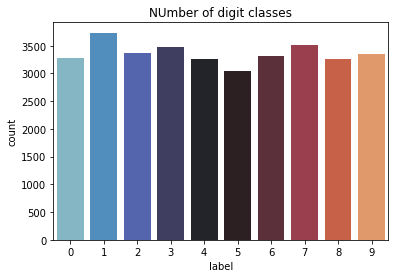

In [0]:
#y_train
plt.plot(figure=(16, 10))
g = sns.countplot(y_train, palette='icefire')
plt.title('NUmber of digit classes')
plt.show()

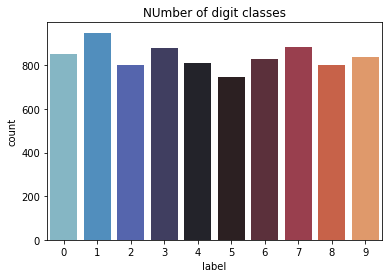

In [0]:
#y_test
plt.plot(figure=(16, 10))
g2 = sns.countplot(y_test, palette='icefire')
plt.title('NUmber of digit classes')
plt.show()

**The dataset is based on gray-scale images of handwritten digits and each image is 28x28. Each pixel has a number associated with it, where 0 is a dark pixel and 255 is a white pixel. Both the train and test data-set have 785 columns where, ‘label’ column represents the handwritten digit and remaining 784 columns represent the (28, 28) pixel values.**

# **Plot Digit One from dataset**

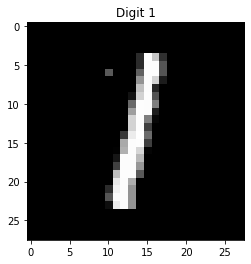

In [20]:
#one
one = df.iloc[37, 1:]
#one.shape
one = one.values.reshape(28, 28)
plt.imshow(one, cmap='gray')
plt.title("Digit 1")
plt.show()


# **Plot Digit Three from dataset**

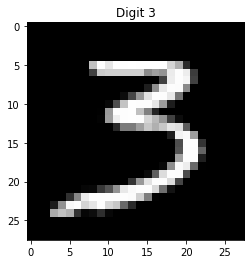

In [25]:
#three
three = df.iloc[25, 1:]
#print(three.shape)
three = three.values.reshape(28, 28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")
plt.show()

# **Plot Digit Four from dataset**

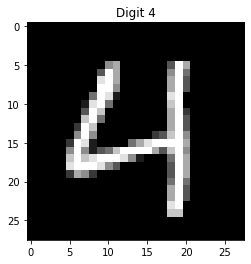

In [19]:
#four
four = df.iloc[205, 1:]
#print(four.shape)
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")
plt.show()

**Found this method to choose the best hyperparameters for example to choose the optimum soft margin parameter C and gamma parameter.**
**Use of GridSearchCV method with 5 folds cross-validation.**
**It takes a lot of time to compile.**

In [0]:
################################################################################################################
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [5,10]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)
# fit the model
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

#Let's now choose the best hyperparameters.

# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
##############################################################################################################


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


#**Building and Evaluating the Final Model**
#**Let's now build and evaluate the final model, the model with highest accuracy.**
# **model with the optimal hyperparameters**

In [24]:
# best model
model_best = SVC(C=10, gamma=0.001, kernel="rbf")

model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("Metric: Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

#The accuracy achieved using a non-linear kernel (~0.94) is mush higher than that of a linear one (~0.91). We can conclude that the problem is highly non-linear in nature.

accuracy 0.9677380952380953 

Metric: Confusion Matrix:
[[836   0   3   0   1   0  10   0   2   0]
 [  0 940   3   0   1   1   1   0   3   1]
 [  2   0 780   5   2   0   4   4   3   1]
 [  1   4   7 854   1   8   0   2   2   3]
 [  1   3   5   0 781   1   2   3   3  12]
 [  6   2   9  10   5 701   4   0   7   3]
 [  3   1  11   0   2   2 812   0   0   0]
 [  0   1   7   1   3   2   0 867   0   3]
 [  2   5  13   4   3   6   2   0 766   1]
 [  3   3   8   7  11   0   0  12   4 792]] 



**To know how many digits were misclassified we can print out the Confusion-Matrix**

**We understood that out of many zeros 836 were correctly classified and same thing is going on next.. We understand that this non linear's model confusion matrix is better(with the best hyperparameters chosen) than the linears' model confusion matrix and non linear's model confusion matrix with random hyperparameters**

**Using a Non-Linear Kernel Model we achieved 96.7% accuracy which is mush higher than that of a linear one 92.4% and randomized non linear one 95.9%. We can conclude that the problem is highly non-linear.**